In [1]:
pip install pandas numpy

In [29]:
#question 1:to convert the given data into CSV file
import pandas as pd
data = {
    "Height": [65.8, 71.5, 69.4, 68.2, 67.8, 68.7, 69.8, 70.1, 67.9, 66.8],
    "Weight": [112, 136, 153, 142, 144, 123, 141, 136, 112, 120],
    "Age": [30, 19, 45, 22, 29, 50, 51, 23, 17, 39],
    "Grip strength": [30, 31, 29, 28, 24, 26, 22, 20, 19, 31],
    "Frailty": ["N", "N", "N", "Y", "Y", "N", "Y", "Y", "N", "N"]
}
df = pd.DataFrame(data)
df.to_csv("/content/frailty_data.csv", index=False)
from google.colab import files
files.download("/content/frailty_data.csv")
df.head()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [30]:
#to get the cleaned file
df = pd.read_csv("/content/frailty_data.csv")
df.fillna(df.median(numeric_only=True), inplace=True)
df['Frailty'] = df['Frailty'].map({'Y': 1, 'N': 0})
df['Grip strength'] = (df['Grip strength'] - df['Grip strength'].min()) / (df['Grip strength'].max() - df['Grip strength'].min())
df.to_csv("/content/cleaned_frailty_data.csv", index=False)
files.download("/content/cleaned_frailty_data.csv")
df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,0.916667,0
1,71.5,136,19,1.000000,0
2,69.4,153,45,0.833333,0
3,68.2,142,22,0.750000,1
4,67.8,144,29,0.416667,1


In [8]:
#question 2
df = pd.read_csv("/content/StudentsPerformance (1).csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
#to find the column names
import pandas as pd
file_path = "/content/StudentsPerformance (1).csv"
df = pd.read_csv(file_path)
print(df.columns)


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


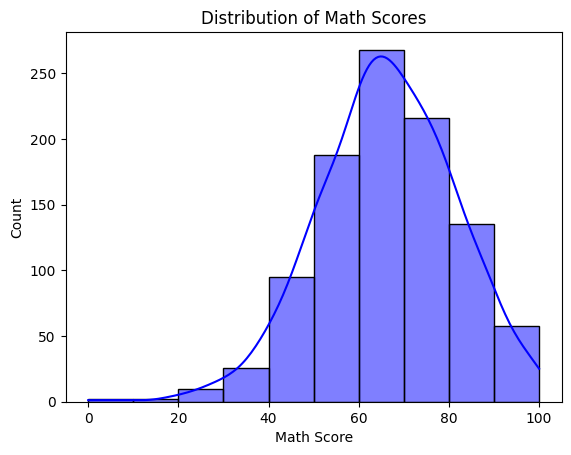

In [22]:
#1)This is for Histogram :
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
file_path = "/content/StudentsPerformance (1).csv"
df = pd.read_csv(file_path)
sns.histplot(df['math score'], bins=10, kde=True, color='blue')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Count')
plt.show()


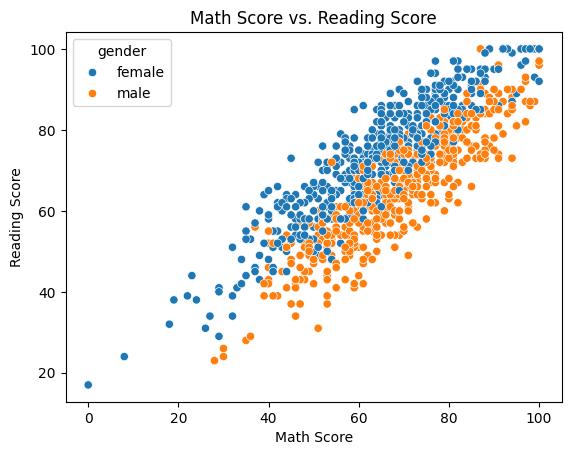

In [23]:
#2)This is for scatter plot :
sns.scatterplot(x=df['math score'], y=df['reading score'], hue=df['gender'])
plt.title('Math Score vs. Reading Score')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()

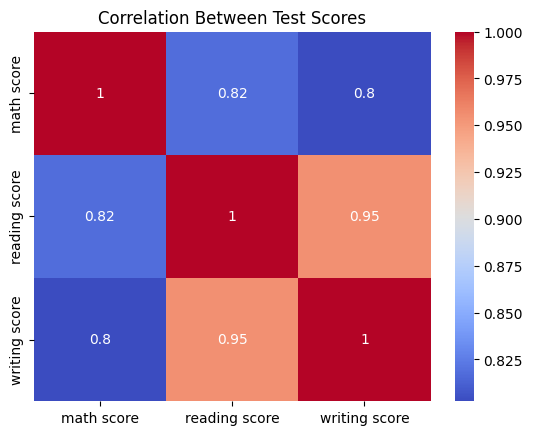

In [24]:
#3)This is for HeatMap:
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Test Scores')
plt.show()

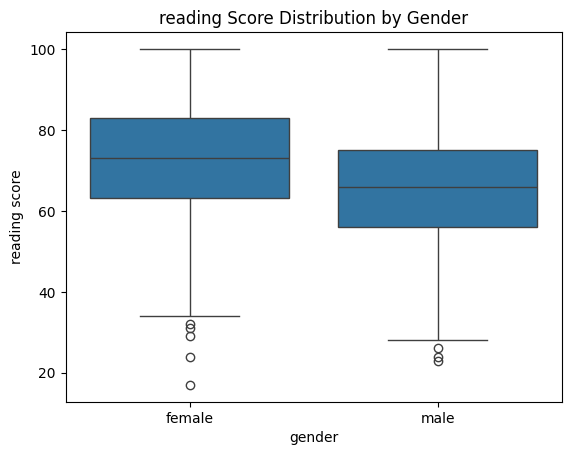

In [25]:
#4)This is for BoxPlot:
sns.boxplot(x=df['gender'], y=df['reading score'])
plt.title('reading Score Distribution by Gender')
plt.show()

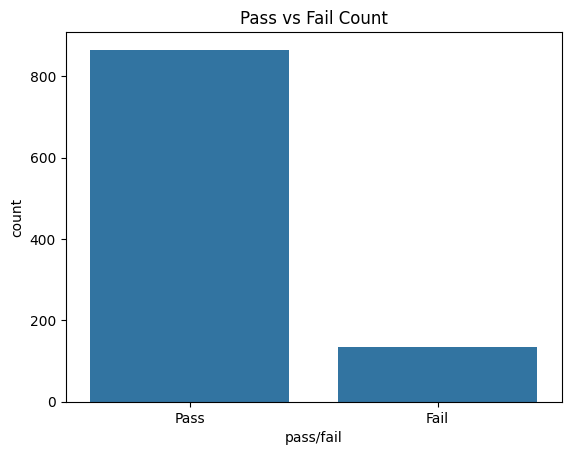

In [26]:
#5)This is for BarChart:
df['pass/fail'] = df['math score'].apply(lambda x: 'Pass' if x >= 50 else 'Fail')
sns.countplot(x='pass/fail', data=df)
plt.title('Pass vs Fail Count')
plt.show()

In [27]:
plt.savefig("/content/histogram.png")

<Figure size 640x480 with 0 Axes>